In [3]:
 #Import necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [6]:
def handleRate(value):
    # Convert value to string and split by '/'
    value = str(value).split('/')[0]
    # Convert the first part of the split value to float
    return float(value)

# Apply the handleRate function to the 'rate' column of the dataframe
dataframe['rate'] = dataframe['rate'].apply(handleRate)

# Print the first few rows of the dataframe to check the result
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

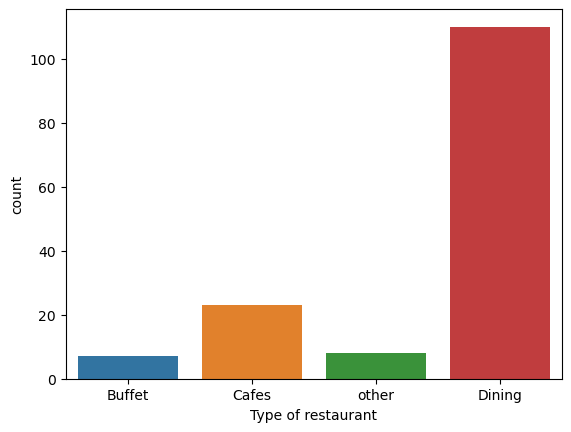

In [8]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

Text(0, 0.5, 'Votes')

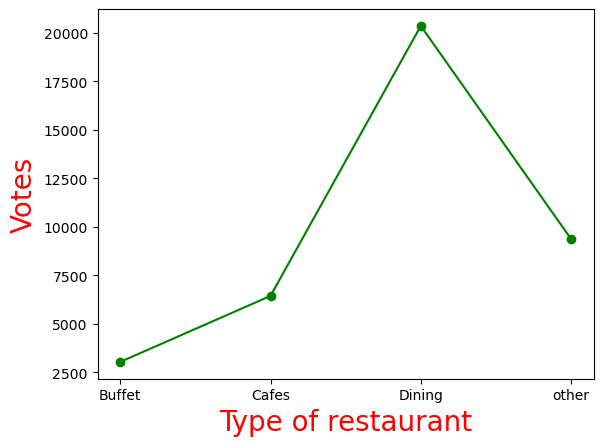

In [10]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)  

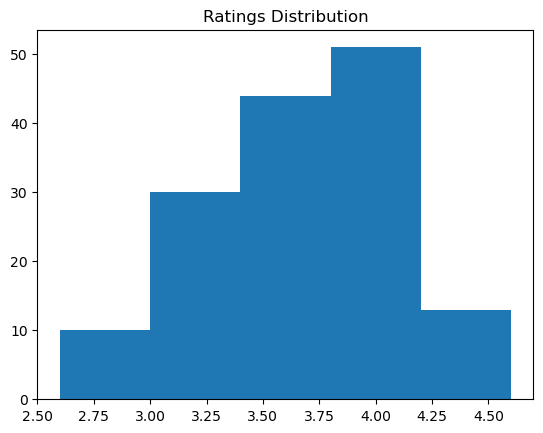

In [11]:
plt.hist(dataframe['rate'], bins=5)
plt.title("Ratings Distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

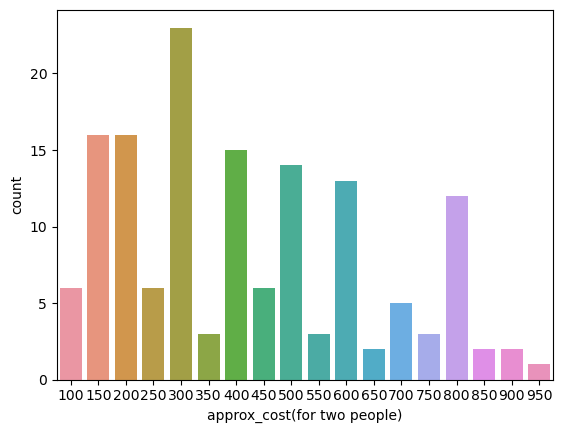

In [12]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

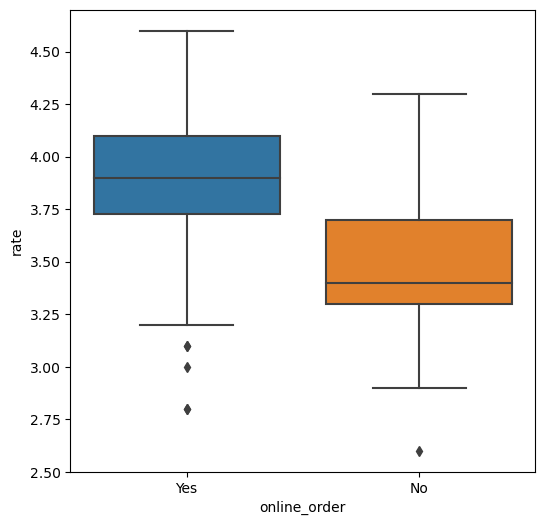

In [13]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

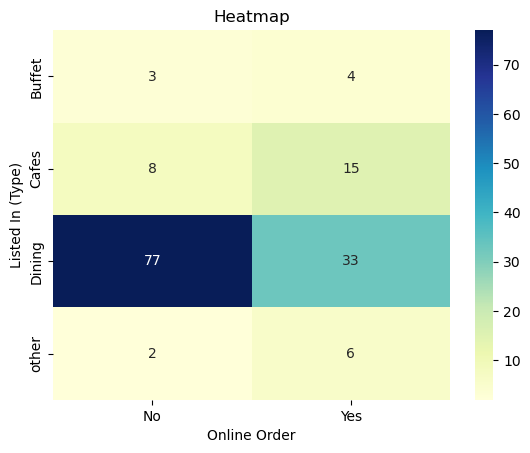

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table with aggregation function 'size' and fill missing values with 0
pivot_table = dataframe.pivot_table(
    index='listed_in(type)', 
    columns='online_order', 
    aggfunc='size', 
    fill_value=0
)

# Generate the heatmap with formatted annotations
sns.heatmap(pivot_table, annot=True, fmt='d', cmap="YlGnBu")

# Set the title and labels
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")

# Display the heatmap
plt.show()


                  name  votes
38   Empire Restaurant   4884
86       Meghana Foods   4401
7               Onesta   2556
44              Onesta   2556
65         Kabab Magic   1720
37     Szechuan Dragon   1647
54        Roving Feast   1047
14     San Churro Cafe    918
2      San Churro Cafe    918
67  Gustoes Beer House    868


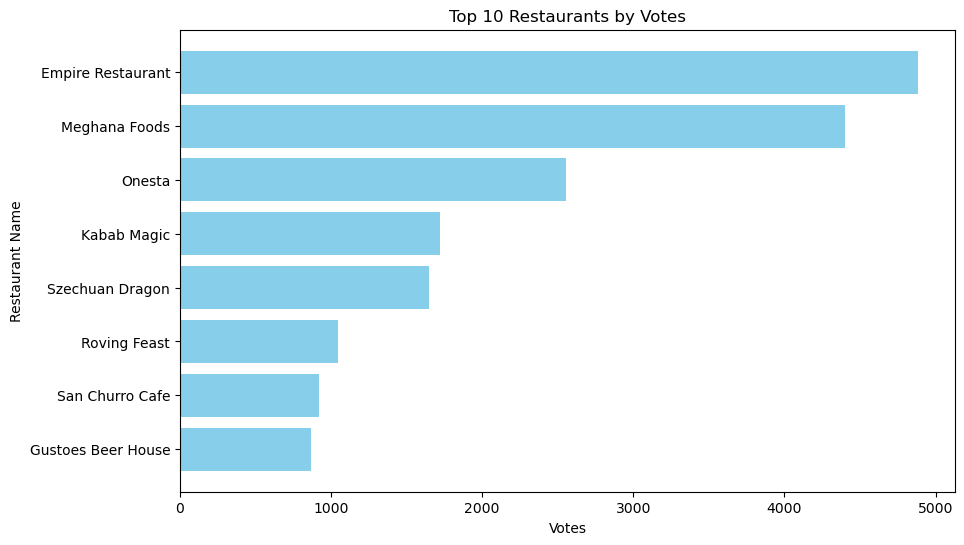

In [19]:
top_restaurants = dataframe[['name', 'votes']].sort_values(by='votes', ascending=False).head(10)

# Print the top 10 restaurants
print(top_restaurants)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_restaurants['name'], top_restaurants['votes'], color='skyblue')
plt.xlabel('Votes')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Restaurants by Votes')
plt.gca().invert_yaxis()  # To display the highest votes at the top
plt.show()


listed_in(type)
Buffet    3.842857
Cafes     3.765217
Dining    3.571818
other     3.912500
Name: rate, dtype: float64


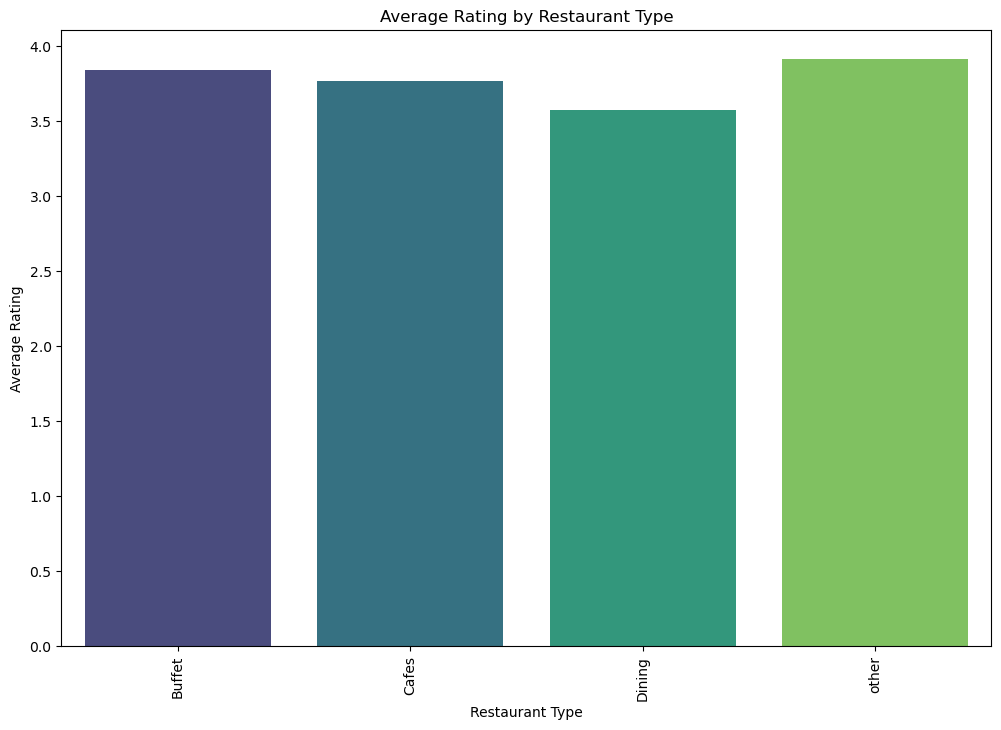

In [20]:
avg_rating_by_type = dataframe.groupby('listed_in(type)')['rate'].mean()
print(avg_rating_by_type)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rating_by_type.index, y=avg_rating_by_type.values, palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Restaurant Type')
plt.ylabel('Average Rating')
plt.title('Average Rating by Restaurant Type')
plt.show()

In [22]:
from prophet import Prophet
# Assuming you have a 'date' column and want to forecast 'rate' (average rating)
dataframe['date'] = pd.to_datetime(dataframe['date'])
daily_avg = dataframe.groupby('date')['rate'].mean().reset_index()

# Rename columns for Prophet
daily_avg.columns = ['ds', 'y']

# Initialize and fit the model
model = Prophet()
model.fit(daily_avg)

# Create a dataframe for future dates
future = model.make_future_dataframe(periods=30)  # Forecasting for the next 30 days

# Make predictions
forecast = model.predict(future)

# Plot the results
fig = model.plot(forecast)
plt.title('Forecast of Average Rating')
plt.show()

# Plot components (trend, weekly seasonality, etc.)
fig2 = model.plot_components(forecast)
plt.show()

ModuleNotFoundError: No module named 'prophet'